In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Easy unsupervised learning 
With python, scikit-learn, and handwritten digits


## Loading the digits dataset
It's a dataset that contains around 1700 images (8x8 pixels) of handwritten digits. Recognising handwriting is a hard task for a computer, but can nowadays be done with good reliability.

The dataset also contains labels that tell us the ground truth (what digit is contained in each image), but we're not using them (except at the end, for testing), so this is **unsupervised learning**. We'll pretend to only know that there are 10 classes of images (corresponding to 0, 1,..., 9).

In [2]:
from sklearn.datasets import load_digits

digits_dataset = load_digits()
print(digits_dataset.DESCR)

digits = digits_dataset['images']
n_digits = digits.shape[0]  # how many images are there?

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

## Display an example of these digits

These are some of the images we're working with.

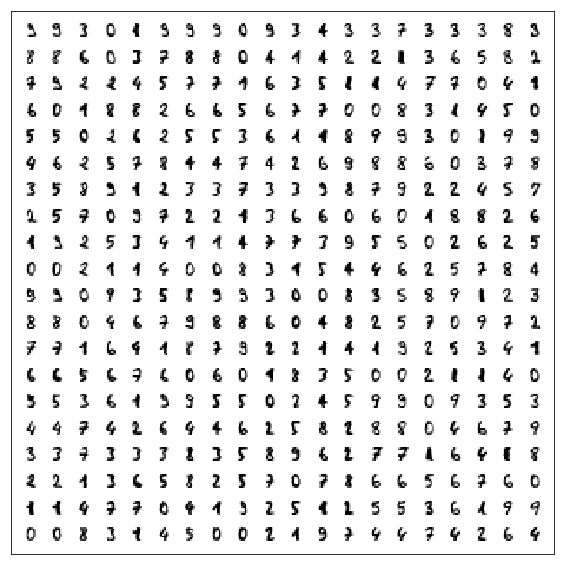

In [3]:
n = 20
sample_size = n**2
d = 10/n

plt.figure(figsize=(10, 10))
random_sample = np.random.choice(n_digits, replace=False, size=sample_size)
for i in range(sample_size):
    x = i//n
    y = i%n
    plt.imshow(digits[i], cmap=plt.cm.gray_r,
               extent=(x, x+d, y, y+d))

plt.xlim([-.5, 20])
plt.ylim([-.5, 20])
plt.xticks([])
plt.yticks([]);

# Dimensionality reduction

Our world is three-dimensional. Mathematically, this means that we need three numbers to identify a point in space: for example the $x$, $y$, $z$ Cartesian coordinates, or, on Earth, latitude, longitude, and altitude.

The "space of digits" is 64-dimensional. What does this mean? Simply, that we need 64 numbers to describe a digit. Each of these number represents a shade of gray for each of the 64 pixels (8x8) of the image.

It's impossible to visualise 64 dimensions geometrically! So, to put them together, we try to put them in **perspective** in the same sense as a three dimensional object is drawn on a piece of paper in two dimensions. We try to do this in a **clever way** that keeps as much information as possible about all the 64 dimensions.

### Display the whole dataset with PCA

Principal Component Analysis is a simple algorithm that picks the directions along which there is *most variance* in the data. We choose to keep the first two only, so that we can draw them down on a plane.

In [4]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_embedding = pca_model.fit_transform(digits.reshape([-1, 64]))

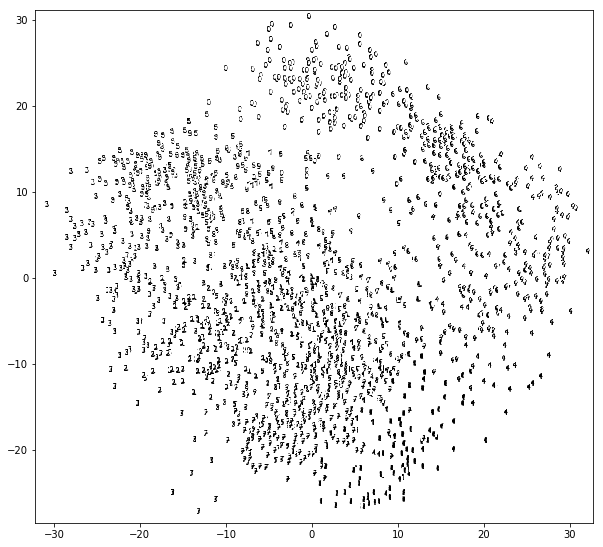

In [5]:
plt.figure(figsize=(10, 10))
plt.gca().set_aspect('equal')

d = .6
for i in range(n_digits):
    plt.imshow(digits[i], cmap=plt.cm.gray_r,
               extent=(pca_embedding[i, 0],
                       pca_embedding[i, 0]+d,
                       pca_embedding[i, 1],
                       pca_embedding[i, 1]+d))


plt.xlim([pca_embedding[:, 0].min()-1, pca_embedding[:, 0].max()+1])
plt.ylim([pca_embedding[:, 1].min()-1, pca_embedding[:, 1].max()+1]);

### Display the whole dataset with t-SNE

t-SNE (t-distributed stochastic neighbor embedding) is a more sophisticated algorithm which performs dimensionality reduction in a non-linear way, as opposed to PCA which is linear only.

In [6]:
from sklearn.manifold import TSNE

# try playing with perplexity, which is a free parameter
tsne_model = TSNE(perplexity=30.)
tsne_embedding = tsne_model.fit_transform(digits.reshape([-1, 64]))

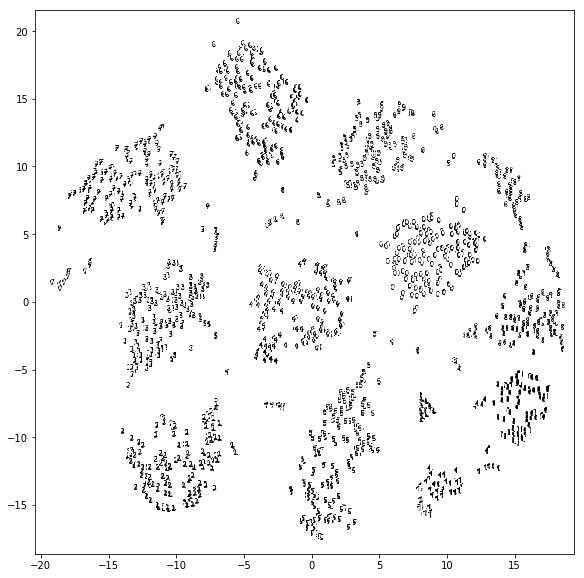

In [7]:
plt.figure(figsize=(10, 10))
plt.gca().set_aspect('equal')

d = .4
for i in range(n_digits):
    plt.imshow(digits[i], cmap=plt.cm.gray_r,
               extent=(tsne_embedding[i, 0],
                       tsne_embedding[i, 0]+d,
                       tsne_embedding[i, 1],
                       tsne_embedding[i, 1]+d))


plt.xlim([tsne_embedding[:, 0].min()-1, tsne_embedding[:, 0].max()+1])
plt.ylim([tsne_embedding[:, 1].min()-1, tsne_embedding[:, 1].max()+1]);

# Clustering with k-means

We can see in the plot above that the dimensionality reduction is so clever that it lumps together images that do look similar to us humans. We just need to identify those clusters and stick a label on them: *this group here, we call it "group of 1s", these others are "the 8s"*, and so on.

"Clustering" means finding groups of points that are near each other. There is no reason to limit ourselves to the dimensionality-reduced space above: we can cluster based on the full 64-dimensional space, so that we don't lose information.

In [8]:
from sklearn.cluster import KMeans

n_classes = 10  # there are 10 digits 0...9

kmeans_model = KMeans(n_clusters=n_classes)
predicted_labels = kmeans_model.fit_predict(digits.reshape([-1, 64]))

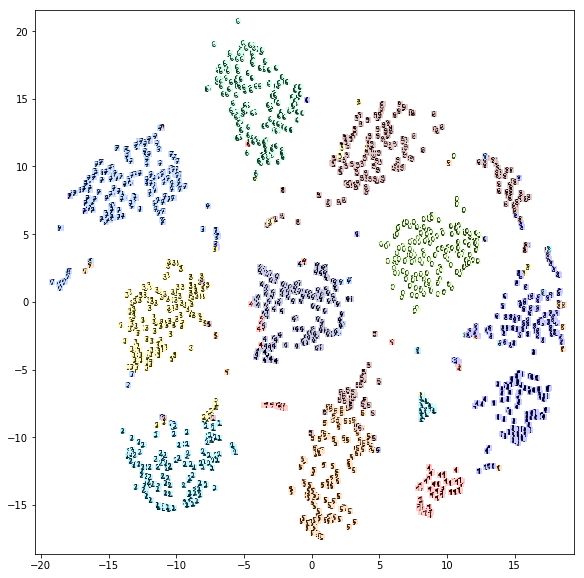

In [9]:
plt.figure(figsize=(10, 10))
plt.gca().set_aspect('equal')

for i in range(n_digits):
    plt.imshow(digits[i], cmap=plt.cm.gray_r,
               extent=(tsne_embedding[i, 0],
                       tsne_embedding[i, 0]+d,
                       tsne_embedding[i, 1],
                       tsne_embedding[i, 1]+d))
    plt.imshow([[predicted_labels[i]]], cmap=plt.cm.jet,
               extent=(tsne_embedding[i, 0],
                       tsne_embedding[i, 0]+d,
                       tsne_embedding[i, 1],
                       tsne_embedding[i, 1]+d),
               vmin=0, alpha=.2, vmax=predicted_labels.max())



plt.xlim([tsne_embedding[:, 0].min()-1, tsne_embedding[:, 0].max()+1])
plt.ylim([tsne_embedding[:, 1].min()-1, tsne_embedding[:, 1].max()+1]);

You can see that the colours are consistent in those groups, and each color corresponds more or less to one digits. There are mistakes, of course...

# Evaluate performance

We used **unsupervised** learning. Which means that we didn't use at all the labels that were provided with the dataset. 

Here, I evaluate the performance also using labels: it is evident from the plot above that *there is* a correspondence between clusters and digits. So we can do a crude thing where we consider "correct" the given labels that coincide with those of the majority of the cluster, and wrong otherwise.

### Find what cluster corresponds to which actual digit

In [10]:
true_labels = digits_dataset['target']

consensus_for_cluster = np.empty(n_classes, dtype=int)
for i in range(n_classes):
    digits_in_cluster = predicted_labels == i
    true_labels_cluster = true_labels[digits_in_cluster]
    consensus_for_cluster[i] = np.argmax(np.bincount(true_labels_cluster))

In [11]:
# translate "cluster id" description into "what number is this"
predicted_digits = consensus_for_cluster[predicted_labels]

### Measure accuracy
Here we compare to the **ground truth**.

In [12]:
training_set_accuracy = np.mean(predicted_digits == true_labels)

print("Accuracy on the training set is:", training_set_accuracy, "%")

Accuracy on the training set is: 0.791875347802 %


Is this good or bad?

This is question has a bit of a philosophical answer. Without labels, our algorithm cannot know that we, humans, consider these
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Handwriting_variations%2C_numeral_1.svg/200px-Handwriting_variations%2C_numeral_1.svg.png)
all the same digit. In a context of *supervised* learning, it could, because we tell it. But here, it can only rely on geometrical similarity. But geometrical similarity would imply that the second of the 1s above might be a slightly tilted 7 instead...

### Show example prediction

I chose image n. 576 and it looks as below.
I believe this image contains the digit 3
and it looks like I'm right :D


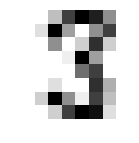

In [13]:
random_digit = np.random.choice(n_digits)

print("I chose image n.",random_digit, "and it looks as below.")

plt.figure(figsize=(2,2))
plt.imshow(digits[random_digit], cmap=plt.cm.gray_r)
plt.axis('off');

prediction = predicted_digits[random_digit]
truth = true_labels[random_digit]
print("I believe this image contains the digit", prediction)

if prediction==truth:
    print("and it looks like I'm right :D")
else:
    print("but unfortunately the dataset says it's a", truth, ":(")